Analyze insurance data to determine the charges based on the attributes

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Load Data and Preprocess

In [18]:
data = pd.read_csv("insurance.csv")
# print(data.keys())
print(data.dtypes)
print(data.describe())
# print('Smoker: ', data['smoker'].unique())
# print('Sex: ', data['sex'].unique())
# print('Region: ', data['region'].unique())


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


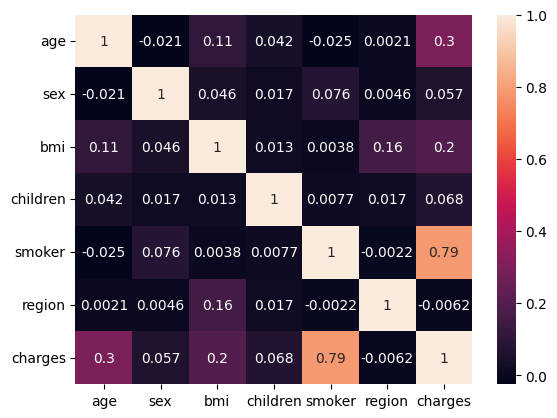

In [19]:

##Convert categorical values to one-hot encoding/dummy values
data['sex'] = data['sex'].map({'male': 1, 'female': 0})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
#data = pd.get_dummies(data, columns=['region'])
data['region'] = LabelEncoder().fit_transform(data['region'])
#print(data.head())
sns.heatmap(data=data.corr(), annot=True) #See the correlation of the features and also gives us an idea of which attribute has the most impact on charges
print(data.keys())

train_data, test_data = train_test_split(data, test_size=0.1, random_state=42) #Split data for 90% training and 10% for testing
#validation_data, test_data = train_test_split(vt_data, test_size=0.5, random_state=42) # Get validation and test set from earlier 20% validation/test data

train_y = train_data['charges']
train_x = train_data.drop('charges', axis=1)

# val_y = validation_data['charges']
# val_x = validation_data.drop('charges', axis=1)

test_y = test_data['charges']
test_x = test_data.drop('charges', axis=1)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 47.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


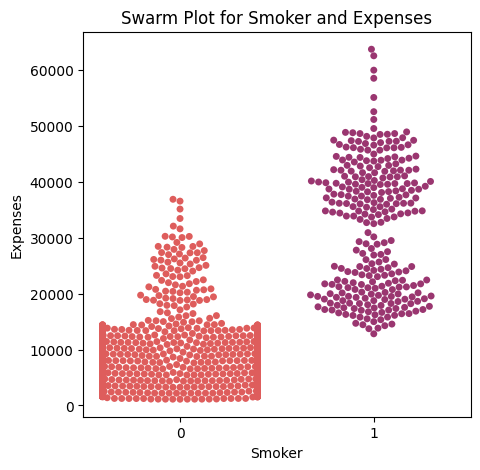

In [30]:
#Heatmap shows that smoker has the most correaltion with charges so lets take a look at its swarm plot.
plt.figure(figsize=(5,5))
sns.swarmplot(data= data, x='smoker', y='charges', palette='flare', hue='smoker', legend=False)
plt.title('Swarm Plot for Smoker and Expenses')
plt.xlabel('Smoker')
plt.ylabel('Expenses')
plt.show()

Linear Regression Model

In [20]:
model_lr = LinearRegression()
model_lr.fit(train_x, train_y)


#Validation Set
# val_pred = model_lr.predict(val_x)
# val_mse = mean_squared_error(val_y, val_pred)
# print('Validation MSE: ', val_mse)
# print('Validation R2: ', model_lr.score(val_x, val_y))

#Test Set
test_pred = model_lr.predict(test_x)
test_mse = mean_squared_error(test_y, test_pred)
print('Test MSE: ', test_mse)
print('Test R2: ', model_lr.score(test_x, test_y))

Test MSE:  32402757.391010426
Test R2:  0.7651213280845761


Can We Improve?<br> 
Lets try to preprocess data more...

In [25]:
#Standardize age and bmi perhaps...?
#Seaborn heatmap indicates a slighlty neg correlation between charges and region so lets omit that as well
#Since charges are very large values, we can apply log function to make it more feasible for our model to work with

scaler = StandardScaler()
train_x['age'] =  scaler.fit_transform(train_x[['age']])
train_x['bmi'] = scaler.fit_transform(train_x[['bmi']])

# val_x['age'] =  scaler.fit_transform(val_x[['age']])
# val_x['bmi'] = scaler.fit_transform(val_x[['bmi']])

test_x['age'] =  scaler.fit_transform(test_x[['age']])
test_x['bmi'] = scaler.fit_transform(test_x[['bmi']])

model2_lr = LinearRegression().fit(train_x, np.log(train_y))

#Validation Set
# val_pred = model2_lr.predict(val_x)
# val_mse = mean_squared_error(np.log(val_y), val_pred)
# print('Validation MSE: ', val_mse)
# print('Validation R2: ', model2_lr.score(val_x, np.log(val_y)))

#Test Set
test_pred = model2_lr.predict(test_x)
test_mse = mean_squared_error(np.log(test_y), test_pred)
print('Test MSE: ', test_mse)
print('Test R2: ', model2_lr.score(test_x, np.log(test_y)))


Test MSE:  0.1820034383377237
Test R2:  0.7898657364267534
